이번 강의에서는 바닐라 RNN보다 발전된 LSTM과 GRU에 대해서 알아보자

 

### 지난 강의 복습  

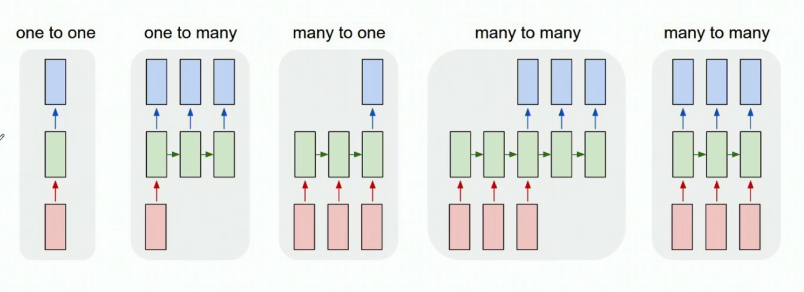  

지금까지는 one to one의 문제를 주로 해왔는데 sequential data를 다ㅇ뤄야하느는 문제들이 있고 그런 문제들은 주로 이런 4가지의 종류로 나눌 수 있다. 

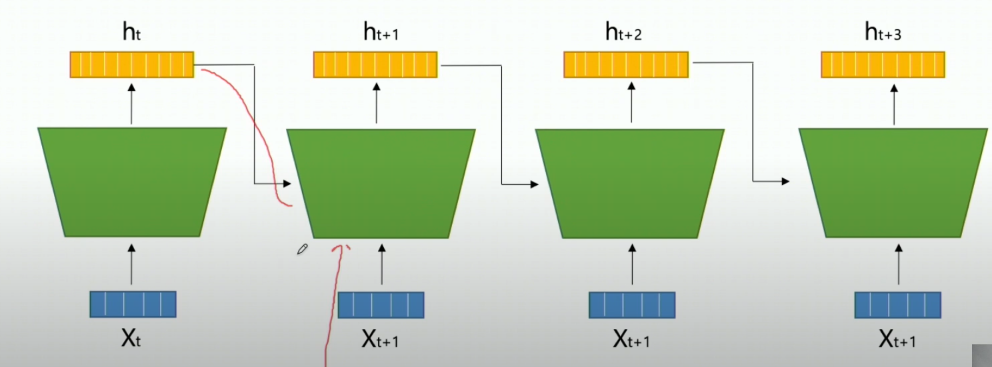

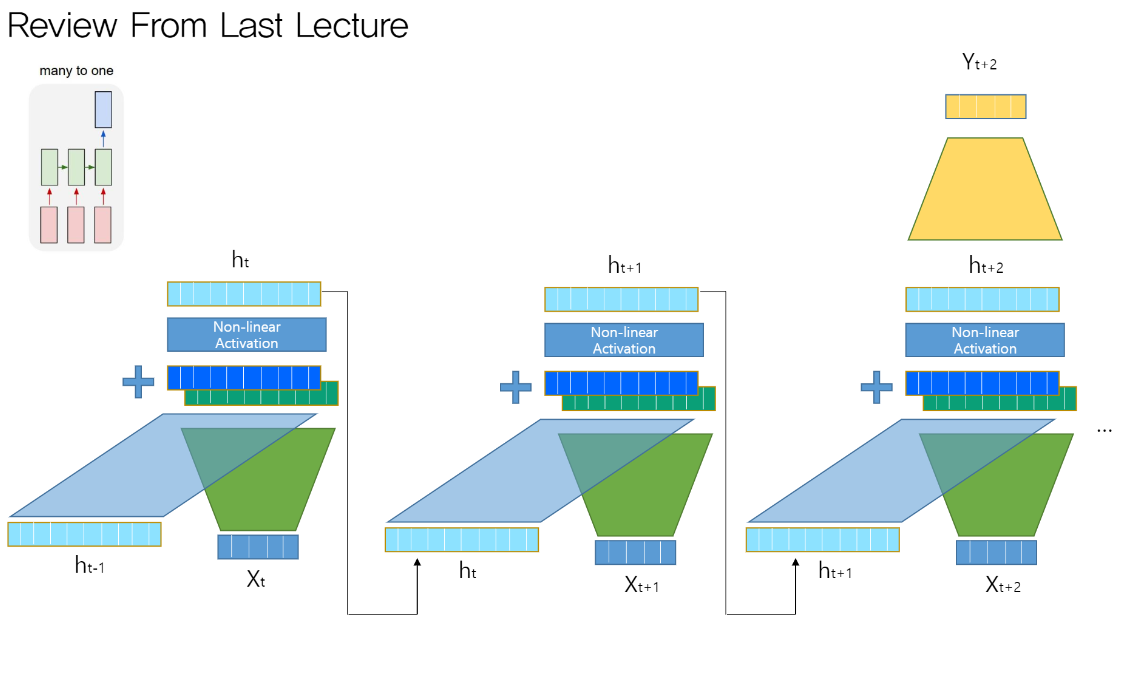

many to one의 경우

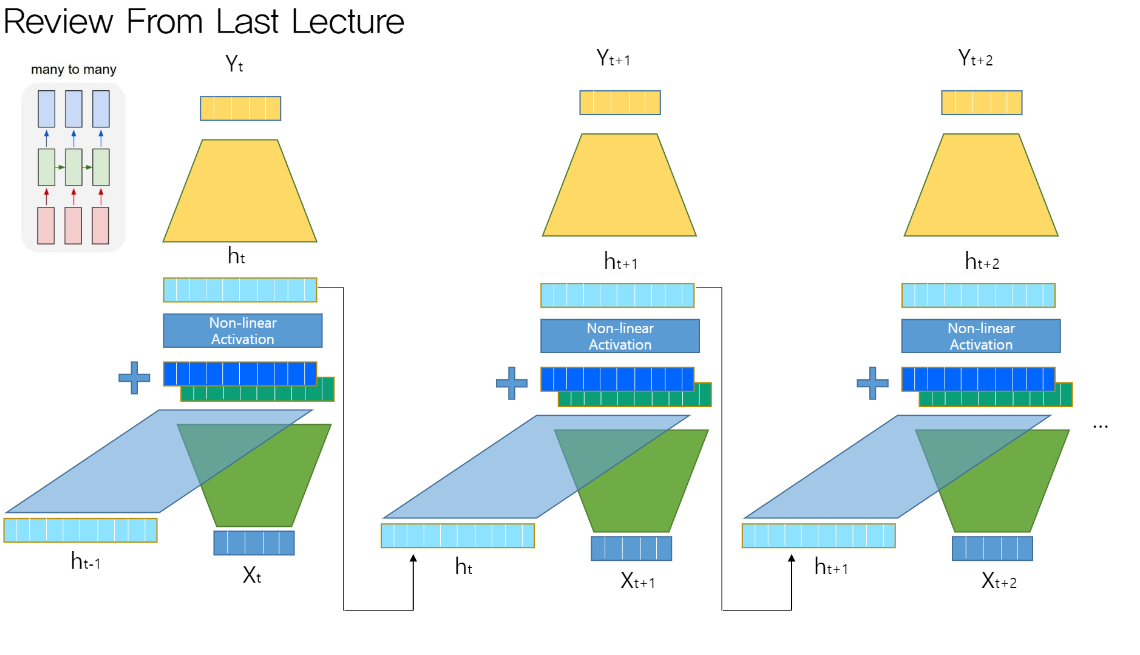

many to many(각각의 h에 대해서 classifier나 regressor를 붙일 수도 있고)

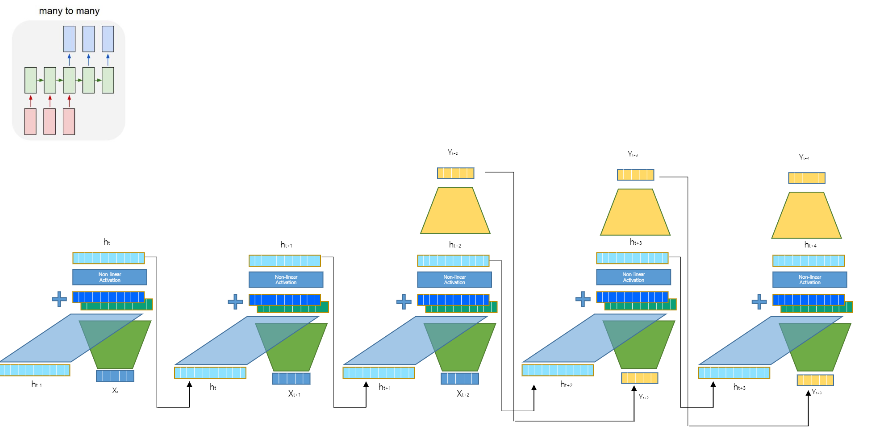

이전 step의 y를 다음 step의 x로 넣어주는 경우
이를 인코더-디코더 프레임워크라고 한다

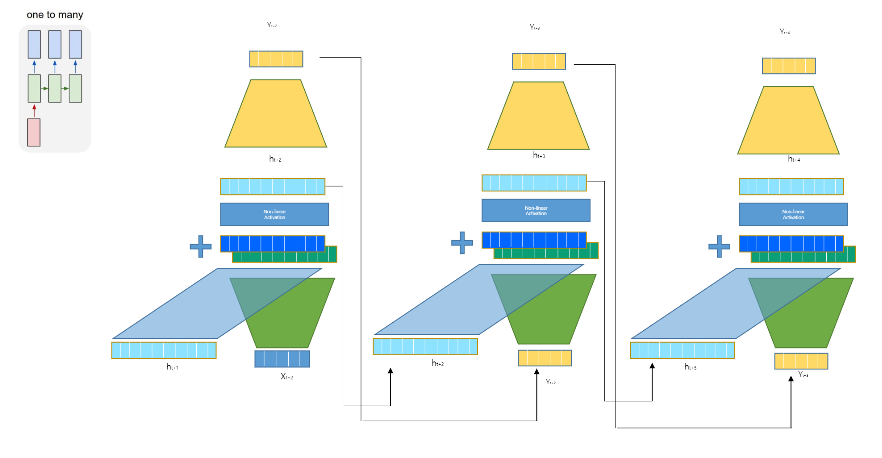

one to many 이미지를 바탕으로 이를 설명하는 텍스트를 만드는 과정의 경우 
h와 y를 통해 새로운 단어들과 h를 인풋으로 넣어줄 수 있다

#### Vanishing Gradient Problem  
바닐라 RNN은 긴 Sequence에 대해서 제대로 학습을 못한다는 문제가 있다.  

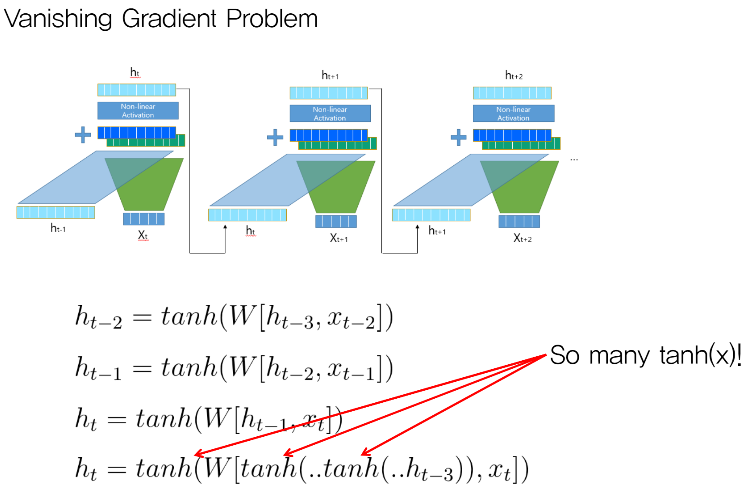

Tanh(x)가 중첩되면서 Gradient가 사라진다

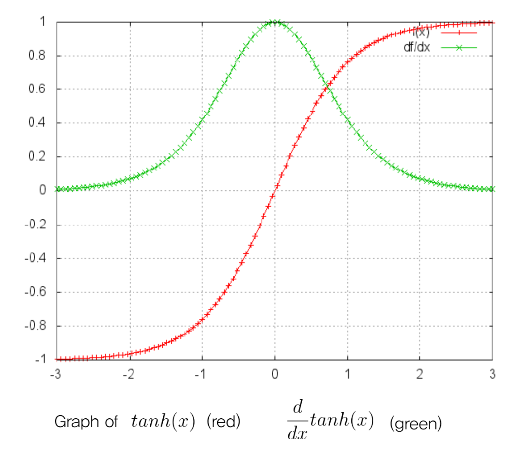  

빨간선이 tanh(x)값이고 초록색이 미분값인데 
역전파시 1보다 작은 값을 계속 곱해주다보면 빠르게 0으로 수렴해 Gradient Vanishing Problem이 나타난다

이 문제를 해결하기 위한 모델이 LSTM이다  


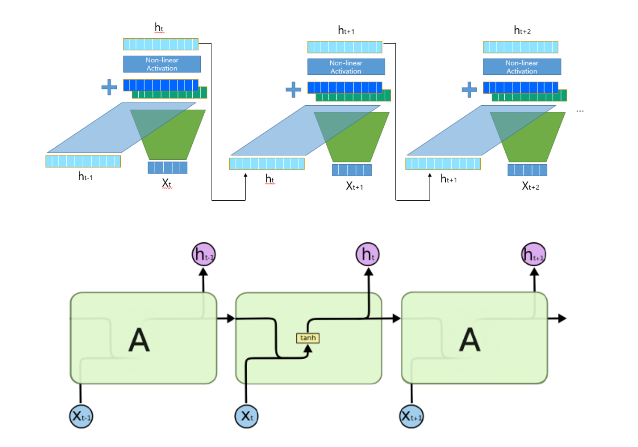

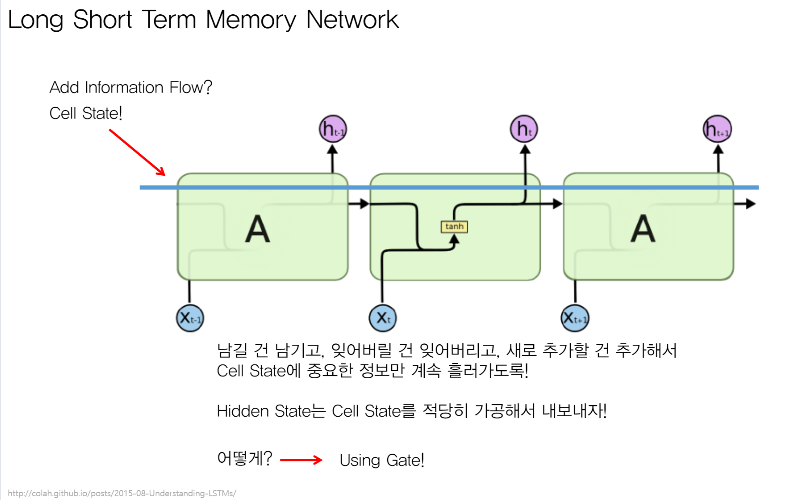

바닐라 RNN에서는 h에 다음 단계에 Input으로 이용될 이전 단계의 정보도 담겨있고, Output으로도 사용되었기 때문에 병목이 생긴다고 생각돼서  
information flow를 따로 만들자는 발상에서 LSTM이 탄생했다.  
윗 그림에서 Cell State라고 불리는 파란선에 남길 건 남기고, 버릴 건 버리고, 추가할 건 추가해서 중요한 정보만 흘러가도록 하자는 것.  
Hidden State는 각 단계에서는 Output인데 이는 Cell State를 적당히 가공해서 내보내자! 

#### Gate 
Gate란 무엇인가? element wise하게 앞의 계수를 곱하는 것

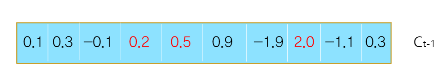

cell state에 이런 10차원짜리 정보가 들어왔고 빨간 글씨만 남기고 싶다면 데이터마다 중요도를 가중치로 주고 그와 곱해준다

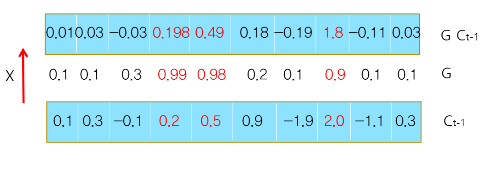

이런 일을 해주는 게 Gate

그럼 이 가중치(Gate Coefficient)는 어떻게 산출되는가?  
-> 작은 Non-linear layer를 활용해서 계산한다.  
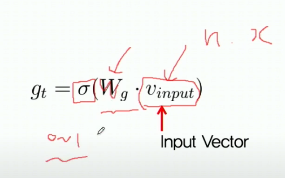  

input은 h와 x로 들어온 거고, Wg는 이를 cell state의 차원으로 맞춰주는 값을 sigmoid를 취해줌  
그러면 gt가 0~1사이의 값  


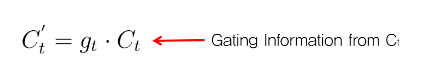  

이전 단계에서의 Ct-1이 들어왔을 때 gt를 곱하게 되면 새로 업데이트 된 Ct'는 중요한 정보는 남고 중요하지 않은 정보는 잊어버리는 게 된다

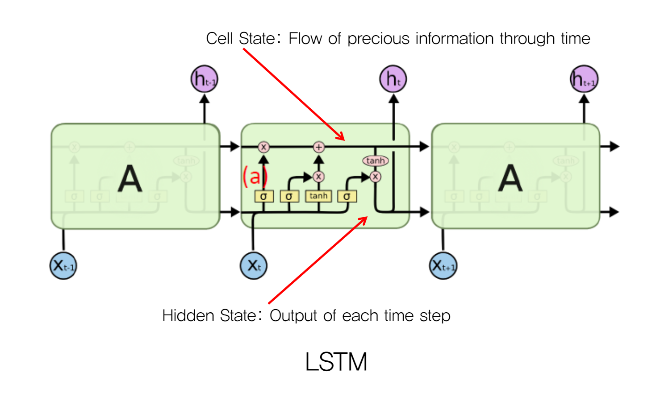

위에 있는 줄이 Cell State : 가치있는 정보를 시간을 거슬러 전달  
아래에 있는 줄이 Hidden State : 그때그때 각각의 단계에서 내보낸 Output을 전달  


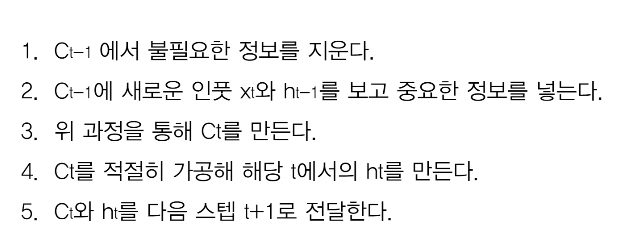

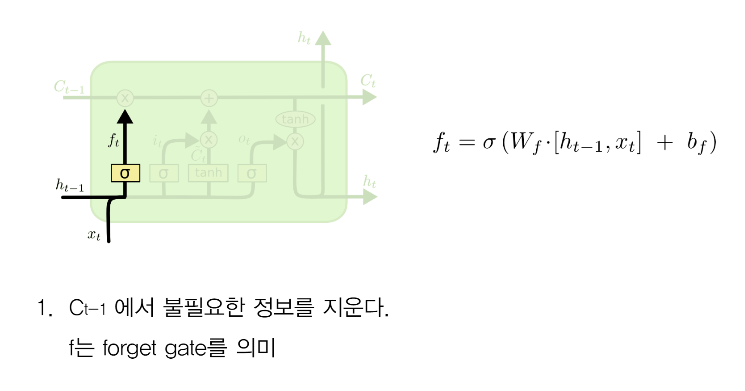

시그모이드 하나가 각각의 게이트,  
즉 이 단계에서는 h와 x를 받아서 중요하지 않은 정보를 계산한다

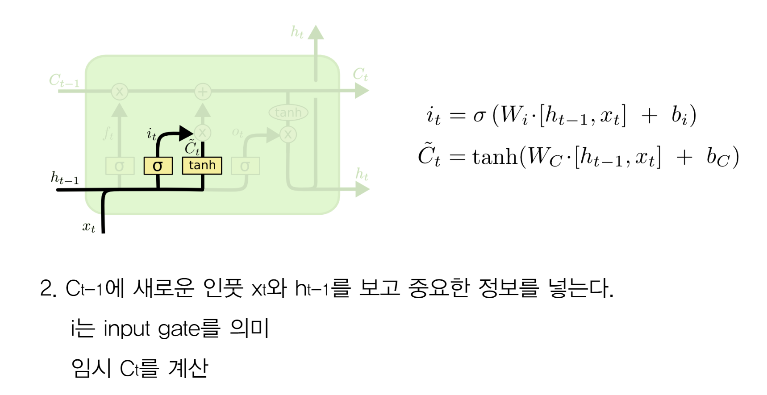  

Input Gate를 만든다.  

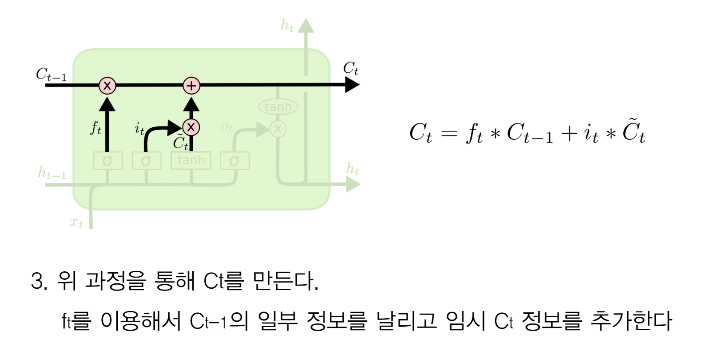

Ct-1은 이전 단계에서 온 Cell State인데   
ft를 이용해서 중요하지 않은 정보를 지우고 이번 단계에서의 인풋을 이용해서 만든 임시 Ct를 더해준다 

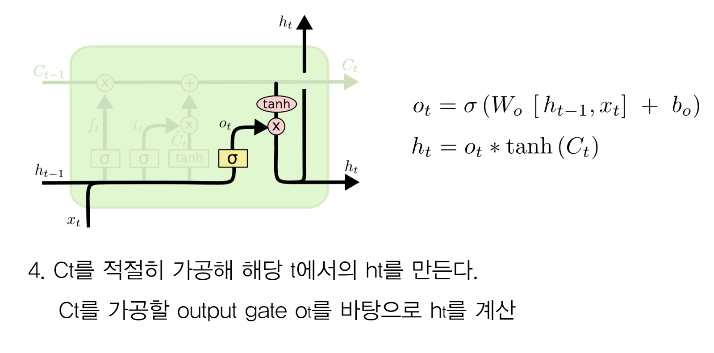

ht는 아까의 Ct를 Tanh를 거쳐준 후 적당한 gate coefficient(아웃풋 게이트) 를 곱해주는데  
이 gate coefficient는 인풋벡터를 차원전한 시켜주고 sigmoid를 취해준 것  


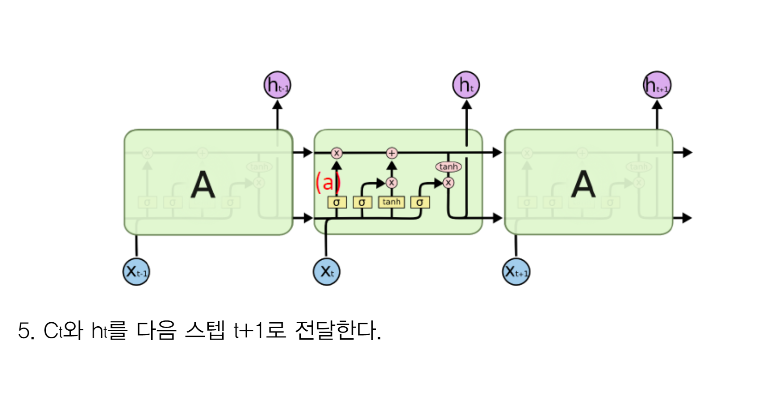

Ct와 ht가 계산되었으니 다음 단계로 전달한다  

무엇이 중요한 정보이고, 무엇을 버려야 하는 정보인지 직접 정해주지 않아도 학습해서 flow가 이루어진다

요악하면  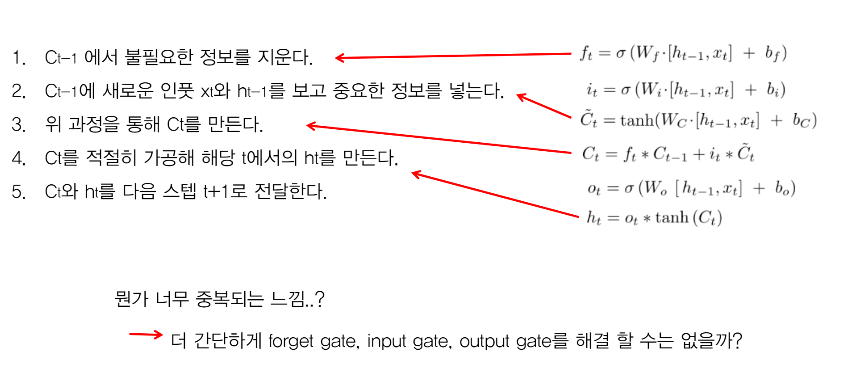

그래서 LSTM은 Vanishing Gradient Problem을 어떻게 해결하는가??

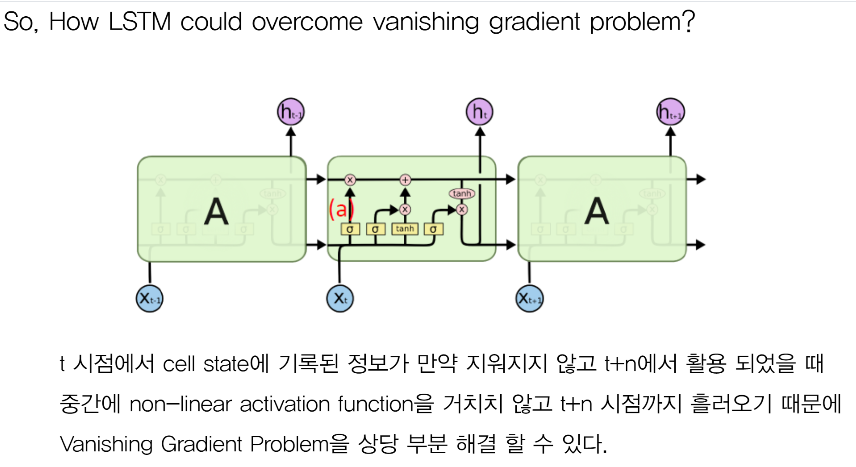

Cell State에 기록된 정보는 non-linear function을 거치지 않고 전달되기 때문에 상당 부분 해결 가능하다

### GRU(Gated Recurrent Unit) 
LSTM에서 게이트들이 너무 많은 것 같다. 좀 더 간단하게 할 수 있는 방법이 없을까? 라는 물음에서 만들어진 알고리즘  

다시 Cell State를 없앴는데도 Vanishing Gradient Problem을 해결했다. 

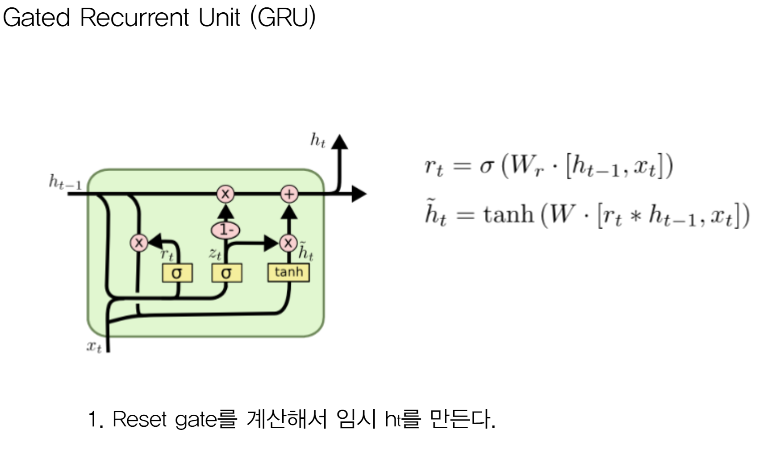

reset gate를 만드는데 이번 단계에서 뭘 지울지를 계산한다.   
ht-1에 reset gate를 곱하고, xt와 취합해서 Tanh를 거치고, 임시 아웃풋인 ht~를 만든다. 

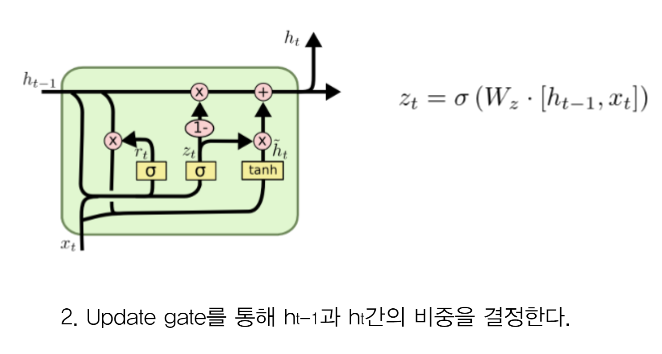

Update gate를 통해 zt를 계산한다.  

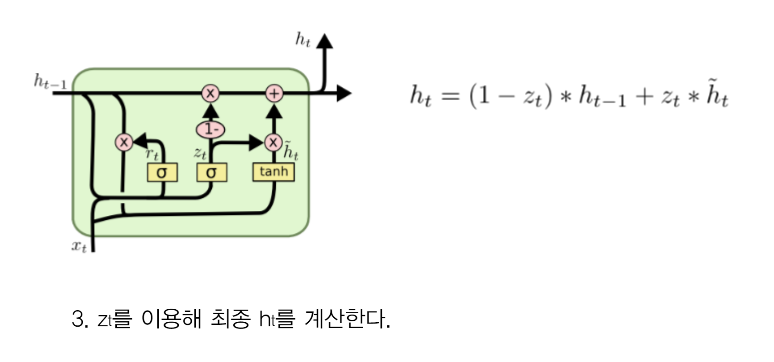

zt와 아까 계산한 임시 ht~를 이용해서 최종 ht를 계산한다  

요약하자면  
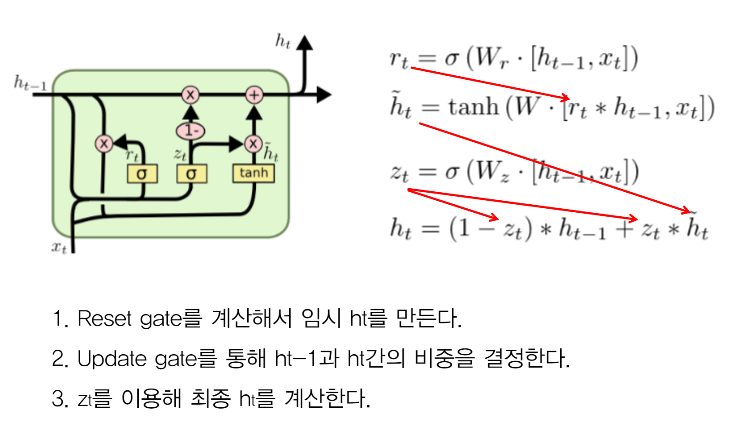

그럼 Vanishing Gradient문제는 어떻게 해결했나??  
-> ht-1에서 온 정보가 non-linear function을 통과하지 않게 함으로써 해결이 된다.  
non-linear한 부분은 따로 통과시키고 더해주는 방법으로 전달


Q, Tanh 말고 다른 Activation Function을 이용하지는 않나?
A. 사용할 수도 있다. 

Q. 성능이 얼마나 차이가 나나??
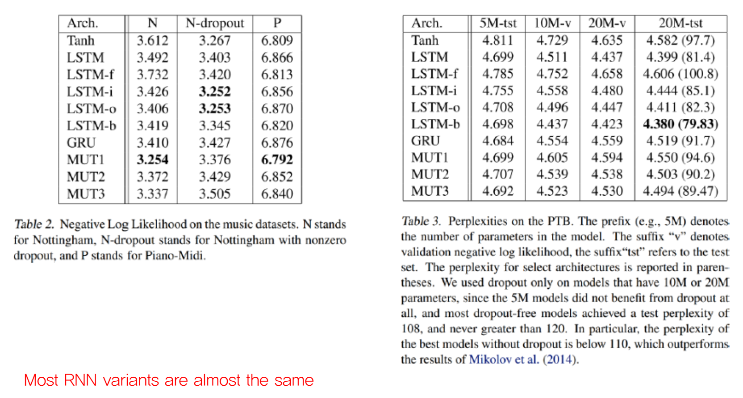


참고로 Tanh라고 되어있는 게 Vanila RNN

#### 요약

- 바닐라 RNN은 vanising gradient problem이 나타난다  
- LSTM은 Cell State를 만들어서 non-linear activation을 우회할 수 있도록 함으로써 이 문제를 해결했다  
- GRU는 Cell State도 없애면서 non-linear activation을 효과적으로 우회했다